In [2]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(1)    # reproducible

# Hyper Parameters
INPUT_SIZE = 1          # rnn input size / image width
LR = 0.02   

In [4]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,     # rnn hidden unit
            num_layers=1,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, output_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []                                   # this is where you can find torch is dynamic
        for time_step in range(r_out.size(1)):      # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [5]:
rnn = RNN()
print(rnn)

optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss() 

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


30


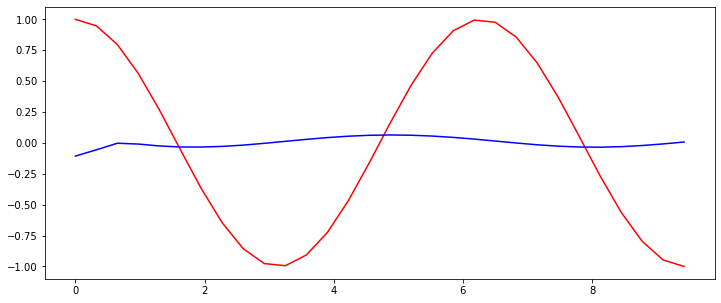

20


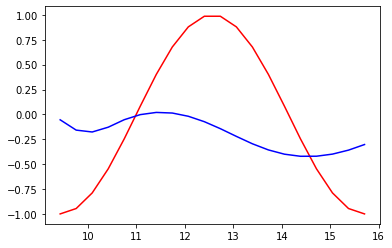

30


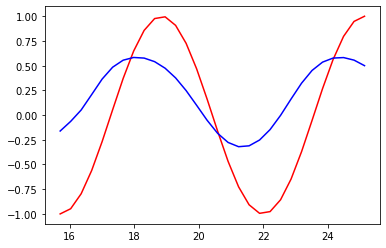

30


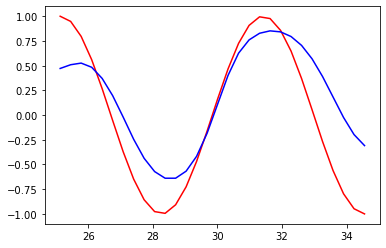

20


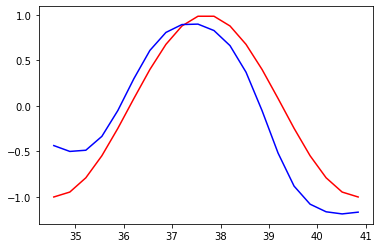

30


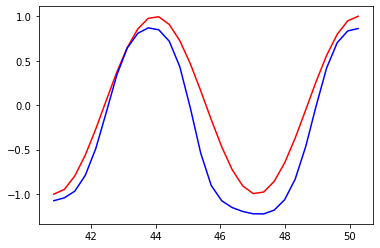

20


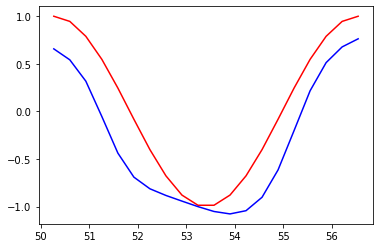

30


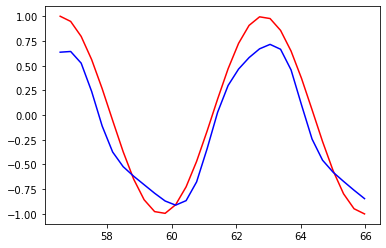

10


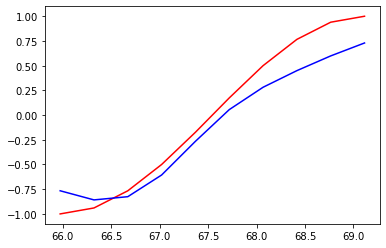

20


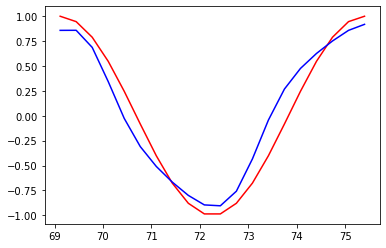

10


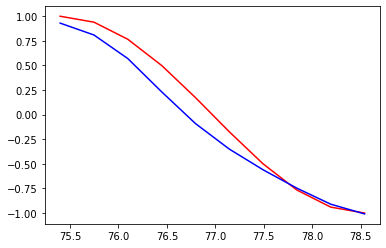

30


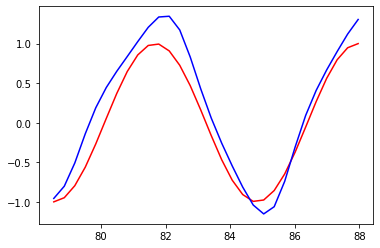

10


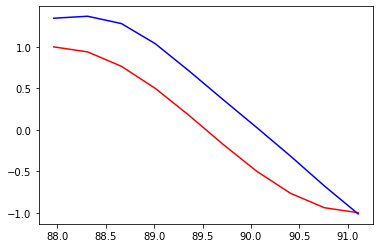

30


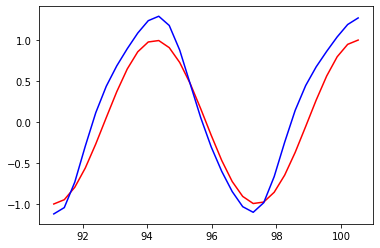

30


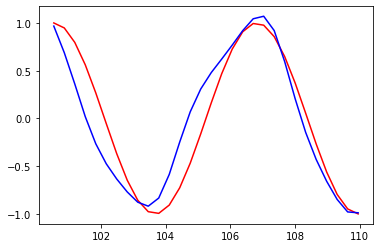

20


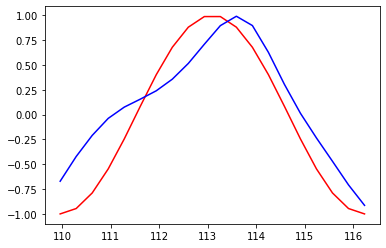

10


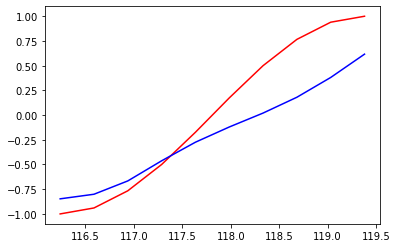

30


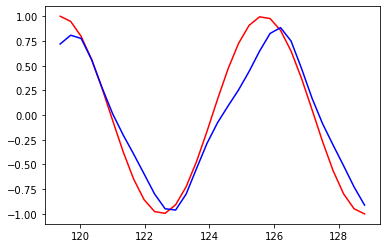

30


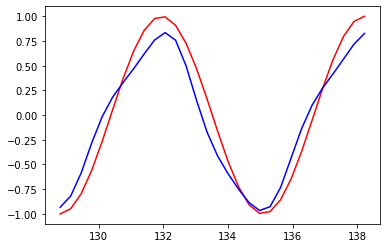

10


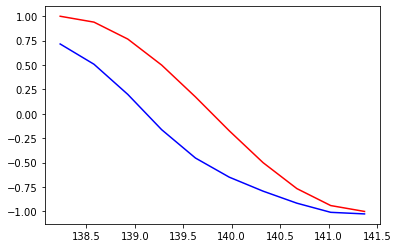

30


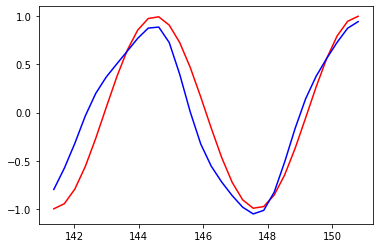

20


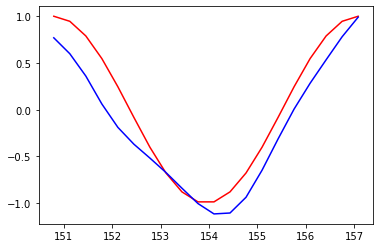

30


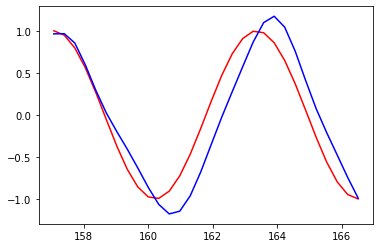

20


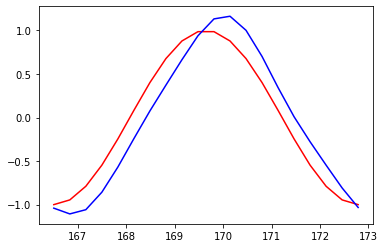

10


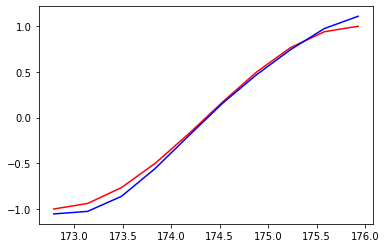

30


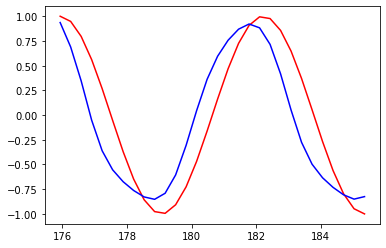

30


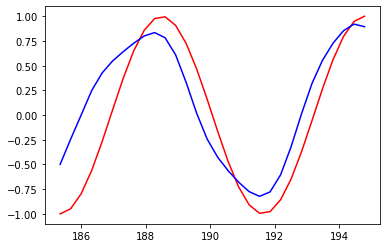

30


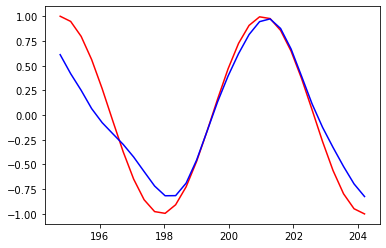

10


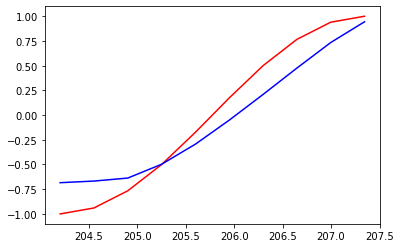

30


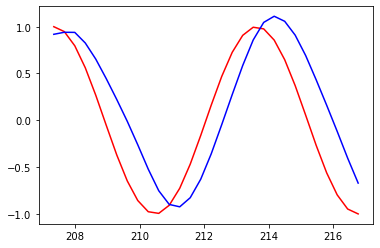

20


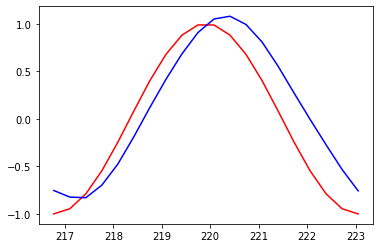

20


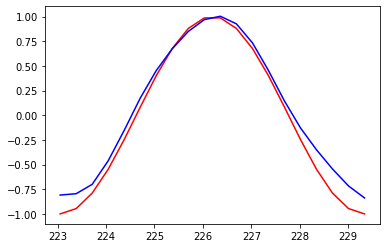

10


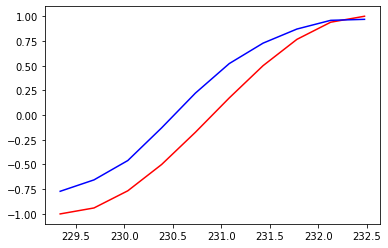

20


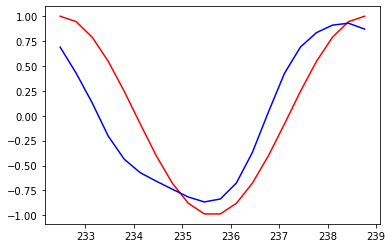

30


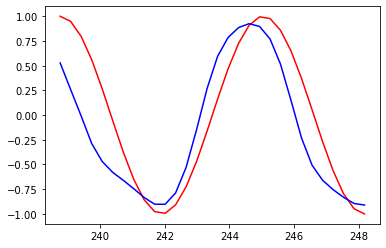

30


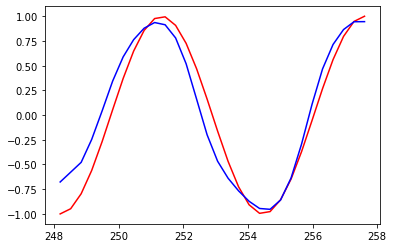

10


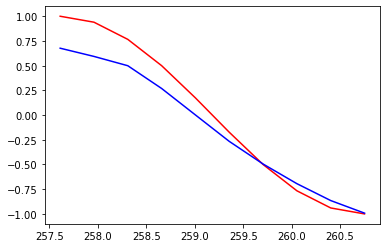

20


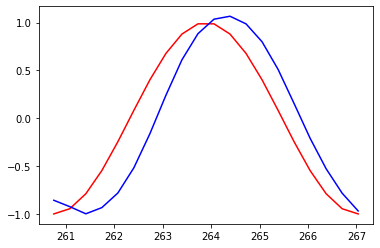

20


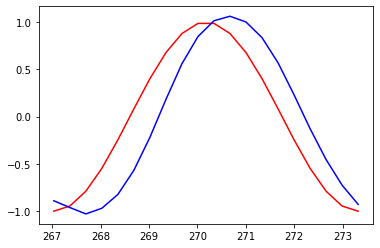

10


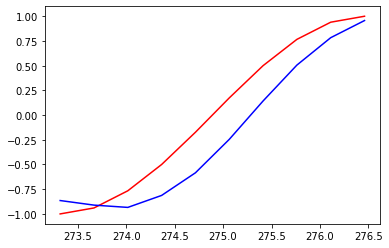

10


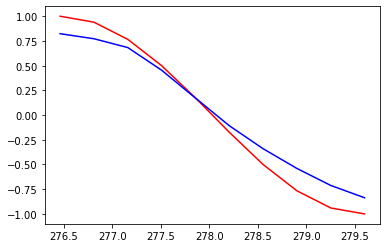

30


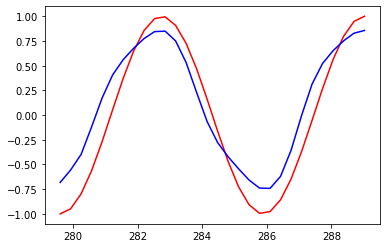

20


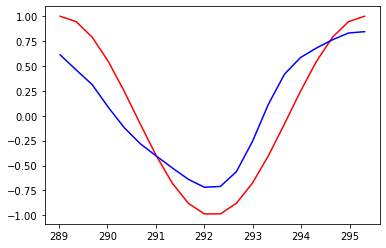

10


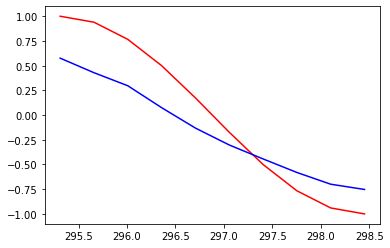

10


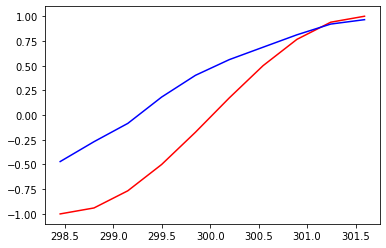

10


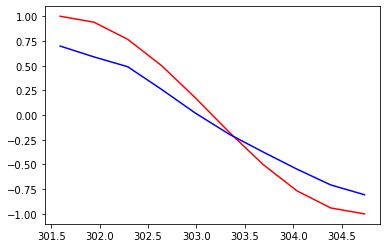

20


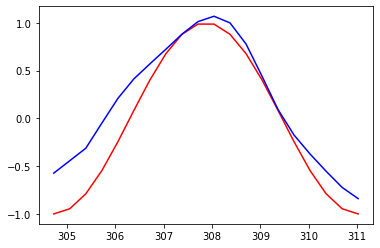

10


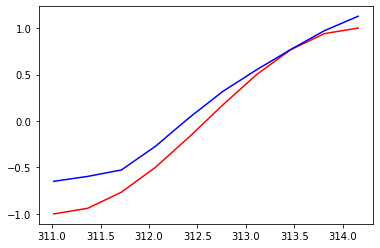

10


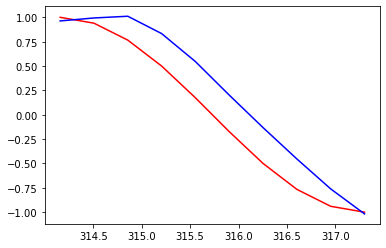

20


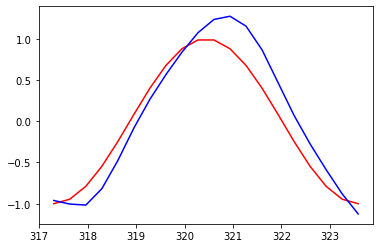

20


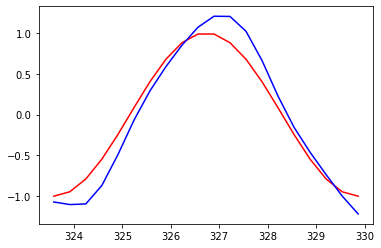

30


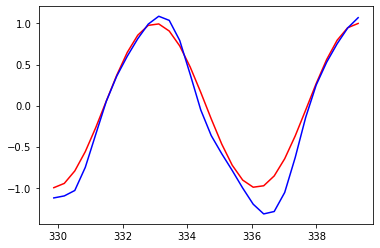

10


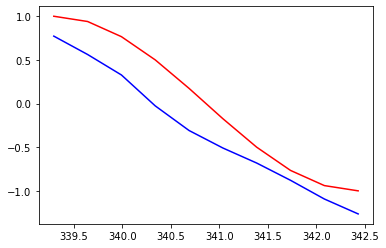

10


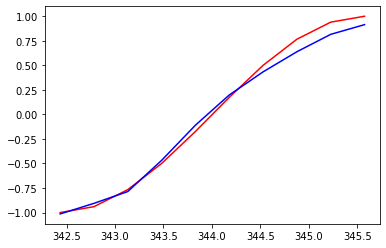

30


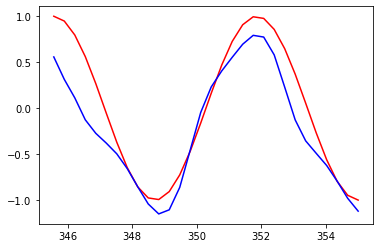

30


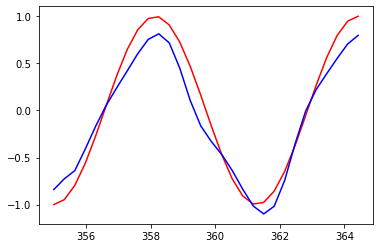

20


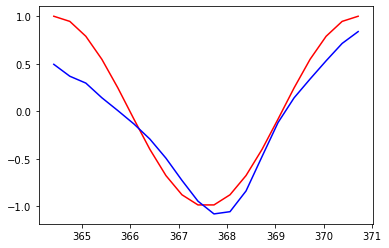

20


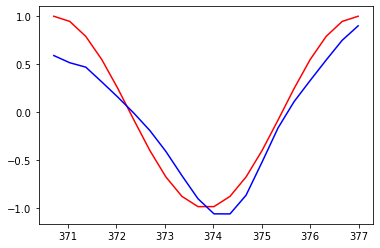

30


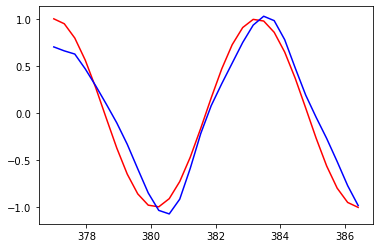

30


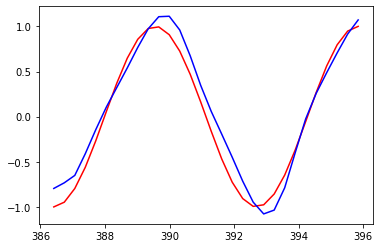

In [6]:
h_state = None   # for initial hidden state

plt.figure(1, figsize=(12, 5))
plt.ion()   # continuously plot

########################  Below is different #########################

################ static time steps ##########
# for step in range(60):
#     start, end = step * np.pi, (step+1)*np.pi   # time steps
#     # use sin predicts cos
#     steps = np.linspace(start, end, 10, dtype=np.float32)

################ dynamic time steps #########
step = 0
for i in range(60):
    dynamic_steps = np.random.randint(1, 4)  # has random time steps
    start, end = step * np.pi, (step + dynamic_steps) * np.pi  # different time steps length
    step += dynamic_steps

    # use sin predicts cos
    steps = np.linspace(start, end, 10 * dynamic_steps, dtype=np.float32)

#######################  Above is different ###########################

    print(len(steps))       # print how many time step feed to RNN

    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients

    # plotting
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw()
    plt.pause(0.05)

plt.ioff()
plt.show()